## **Fruit 360: VGG, GoogleNet and CNN **


### **Import libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
import warnings
warnings.filterwarnings("ignore")

### **Reading and Visualizing the Data**

Image shape (100, 100, 3)


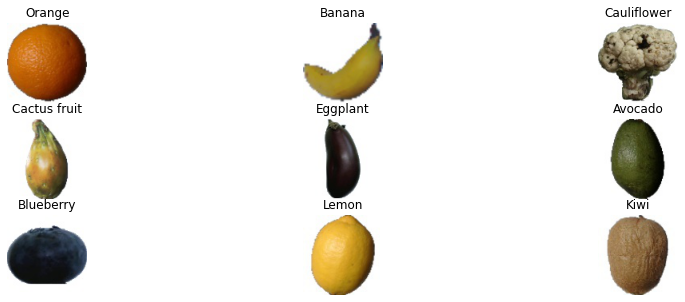

In [2]:
train_path = '/content/drive/MyDrive/fruits-360/Training/'
test_path = '/content/drive/MyDrive/fruits-360/Test/'
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']
fig = plt.figure(figsize =(15,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
x = img_to_array(img)
print("Image shape",x.shape)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale = 1./255)
batch_size = 64
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


### **Baseline Convolution Neural Network**
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. 
<img src="https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.webp"/>
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are:
- Convolutional layer
- Pooling layer
- Fully-connected (FC) layer

The convolutional layer is the first layer of a convolutional network. While convolutional layers can be followed by additional convolutional layers or pooling layers, the fully-connected layer is the final layer. With each layer, the CNN increases in its complexity, identifying greater portions of the image. Earlier layers focus on simple features, such as colors and edges. As the image data progresses through the layers of the CNN, it starts to recognize larger elements or shapes of the object until it finally identifies the intended object.

Here we build and train a baseline CNN model for this fruit image dataset at first.

In [ ]:
cnnmodel = Sequential()
#add convlutional1D layer with 32 filters
cnnmodel.add(Conv2D(256, (3, 3), activation='relu', input_shape=(100,100,3)))
cnnmodel.add(MaxPooling2D((2, 2), strides=2))
cnnmodel.add(Conv2D(64, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D((2, 2), strides=2))
cnnmodel.add(Conv2D(32, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D((2, 2), strides=2))
#enter fully connected layer
cnnmodel.add(Flatten())
cnnmodel.add(Dense(64, activation='relu'))
cnnmodel.add(Dense(32, activation='relu'))
cnnmodel.add(Dense(131, activation='softmax'))
#using binary_crossentropy for our stroke or not prediction
opt = Adam()
cnnmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnnmodel.summary()
history = cnnmodel.fit_generator(generator = train_gen,  epochs=10,validation_data=test_gen,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 256)       7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        147520    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 32)      

### **VGG**


#### Autoencoder

In [ ]:
autoencoder=Sequential()
##encoding
autoencoder.add(Conv2D(64, (3,3), input_shape= (100,100,3),padding='same',activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))
autoencoder.add(Conv2D(32, (3,3),padding='same',activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))
autoencoder.add(Conv2D(16, (3,3),padding='same',activation="relu"))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same',name='encoder'))
## latent space
autoencoder.add(Conv2D(8, (3,3),padding='same',activation="relu"))
## decoding
autoencoder.add(Conv2D(16, (3,3),padding='same',activation="relu"))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3,3),padding='same',activation="relu"))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3,3),padding='same',activation="relu"))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(3, (3, 3)))
autoencoder.add(Flattern())
autoencoder.add(Dense(131))
autoencoder.summary()


NameError: ignored

In [ ]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = autoencoder.fit_generator(generator = train_gen,  epochs=10,validation_data=test_gen)

In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)
encoder.summary()

In [ ]:
images = next(iter(train_gen))[0]
for i in range(5):

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    
    # ORIGINAL IMAGE
    orig = images[i,:,:,:].reshape((-1,64,64,3))
    img = Image.fromarray( (255*orig).astype('uint8').reshape((64,64,3)))
    plt.title('Original')
    plt.imshow(img)

    # LATENT IMAGE
    latent_img = encoder.predict(orig)
    mx = np.max( latent_img[0] )
    mn = np.min( latent_img[0] )
    latent_flat = ((latent_img[0] - mn) * 255/(mx - mn)).flatten(order='F')
    img = Image.fromarray( latent_flat[:2025].astype('uint8').reshape((45,45)), mode='L') 
    plt.subplot(1,3,2)
    plt.title('Latent')
    plt.xlim((-10,55))
    plt.ylim((-10,55))
    plt.axis('off')
    plt.imshow(img)

    # RECONSTRUCTED IMAGE
    decoded_imgs = decoder.predict(latent_img[0].reshape((-1,latentSize[0],latentSize[1],latentSize[2])))
    img = Image.fromarray( (255*decoded_imgs[0]).astype('uint8').reshape((64,64,3)))
    plt.subplot(1,3,3)
    plt.title('Reconstructed')
    plt.imshow(img)
    
    plt.show()

### **Reference**
[1] https://www.kaggle.com/code/shivamb/how-autoencoders-work-intro-and-usecases<br/>
[2] 